## Homework 1

**Exercice 2.6**

You need to implement least square regression using different basis functions for Year (x-axis) and Number of Republicans (y-axis)

1- Load the dataset and plot the figures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the dataset

data_path = "year-sunspots-republicans.csv"
df = pd.read_csv(data_path)
df

,Year,Sunspot_Count,Republican_Count
0,1960,112.3,36
1,1962,37.6,34
2,1964,10.2,32
3,1966,47.0,36
4,1968,105.9,43
5,1970,104.5,44
6,1972,68.9,42
7,1974,34.5,38
8,1976,12.6,38
9,1978,92.5,41


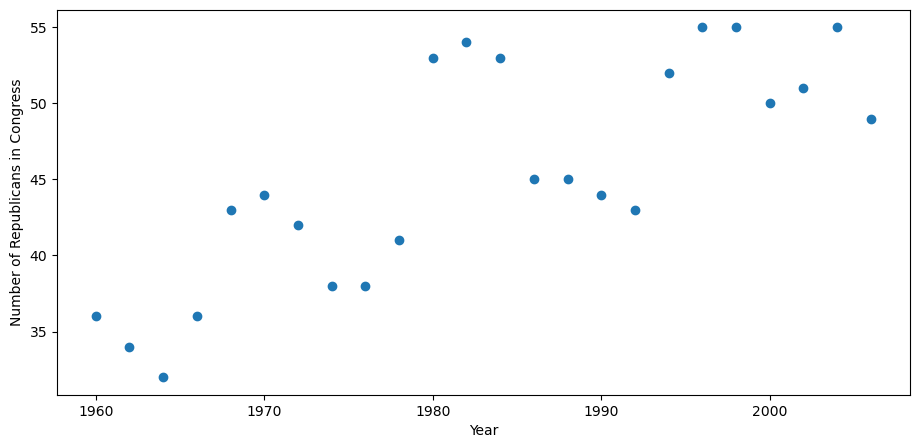

In [3]:
# Plot of the first figure

fig1, ax1 = plt.subplots()

fig1.set_size_inches(11, 5)  # Large x High

# Créer un scatter plot
ax1.scatter(df["Year"], df["Republican_Count"])

# Label the axes
plt.ylabel('Number of Republicans in Congress')
plt.xlabel('Year')

plt.show()


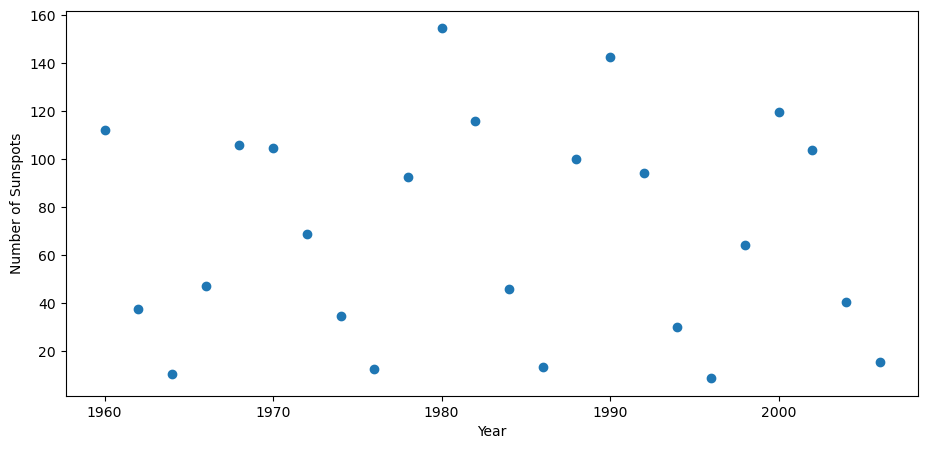

In [4]:
# Plot of the second figure

fig2, ax2 = plt.subplots()

fig2.set_size_inches(11, 5)  # Large x High

# Créer un scatter plot
ax2.scatter(df["Year"], df["Sunspot_Count"])

# Label the axes
plt.ylabel('Number of Sunspots')
plt.xlabel('Year')

plt.show()

2- Implement the procedures to obtain a new feature.

In [5]:
# Scale the Year column

df["Year"] = (df["Year"] - 1960)/40
df.head()

,Year,Sunspot_Count,Republican_Count
0,0.00,112.3,36
1,0.05,37.6,34
2,0.10,10.2,32
3,0.15,47.0,36
4,0.20,105.9,43


3- Plot the data and the regresion lines (include the plot as an image) 

4 - Include for each plot the train error

In [7]:
# Returns the squared distance between the predictions and the ground truth.

def compute_averaged_squared_error(y_hat , y):
    # Parameters:
               #  - y (np.array): target values, of shape (n,).
               #  - y_hat (np.array): prediction given by the linear regression
    
    n = len(y_hat)
    error = np.linalg.norm(y - y_hat, 2)**2

    # Returns: error (float): the averaged squared distance between the predictions and the ground truth.
            
    return error/n

a - Create polynomial features of the type: $\phi_j(x)=x^j$ for $j=1,...,5$ .

In [8]:
max_degree = 5

In [9]:
# Function that create an array of polynomial feature
def basis_a(x, max_degree):
    #Parameters:# - np.array: of size n 
                # - int : the maximum degree of the polynomial features.   
    n = len(x)
    
    # Initialize an array to store the polynomial features
    features = np.zeros((n, max_degree +1 ))
    
    # Populate the array with polynomial features
    for j in range(max_degree+1):
        features[:, j] = x ** j 
        
    #Returns: np.array: of shape (n, max_degree+1 )
    return features


In [10]:
# Function to compute the parameters of the linear regression using the polynomial features.

def fit_least_square(X, y):
#Parameters: - X (np.array)
         #   - y (np.array): target values, of shape (n,).
    w = X.T @ X
    w = np.linalg.pinv(w)   # It is not often inversible so we use the pseudo inverse
    w = w @ X.T
    w_star = w @ y
    
    y_hat = X @ w_star
    
#Returns: - w_star (np.array): parameters of the linear regression, of shape (max_degree + 1,).
        # - y_hat  (np.array): predictions of the linear model, of shape (n,).
    
    return w_star, y_hat

In [11]:
X_a = basis_a(df["Year"], max_degree)

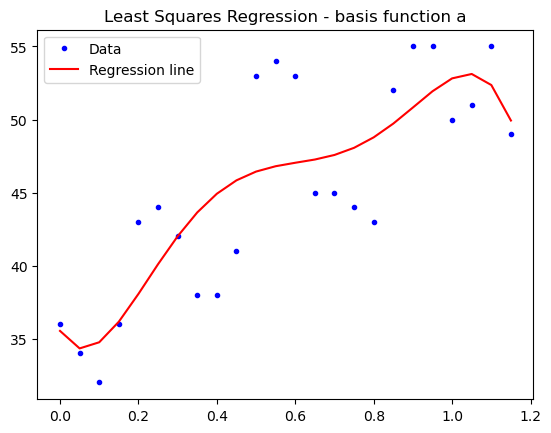

Train error for basis function a:  16.4575


In [12]:
w, y_hat_a = fit_least_square(X_a, df["Republican_Count"])

#Compute the error 
error_a = compute_averaged_squared_error(y_hat_a , df["Republican_Count"])

# Plot the data and regression line using the polynomial features.

plt.plot( df["Year"], df["Republican_Count"], 'b.', label='Data')
plt.plot(df["Year"], y_hat_a, 'r', label='Regression line')
plt.title('Least Squares Regression - basis function a')
plt.legend()
plt.show()


print(f'Train error for basis function a: {error_a: .4f}')

b - Create exponential features of the type: $\phi_j(x)=exp((-40x - mu_j)^2 /25)$  for  $mu_j=0,5,...,50$ .

In [13]:
mu = np.arange(0,51,5)

In [14]:
# Function that create an array of exponential feature
def basis_b(x, mu):
    #Parameters:# - array of size n 
                # - array with the differnet value for mu   
    n = len(x)
    
    # Initialize an array to store the polynomial features
    features = np.ones((n, len(mu)+1))
    
    # Populate the array with polynomial features
    for j in range(len(mu)):
        features[:, j+1] = np.exp(-((40*x - mu[j])**2)/25)
        
    #Returns: np.array: of shape (n, len(mu)+1)
    return features

In [15]:
X_b = basis_b(df["Year"], mu)

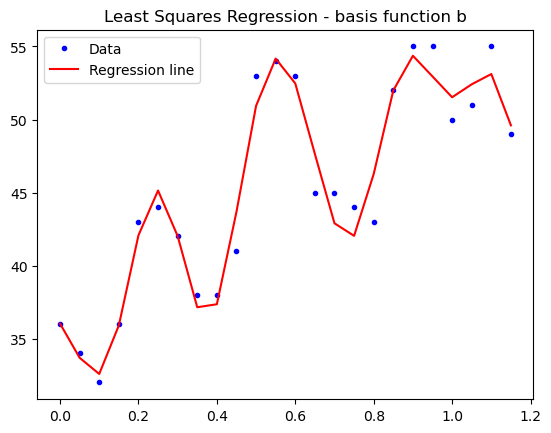

Train error for basis function b:  2.2614


In [16]:
w, y_hat_b = fit_least_square(X_b, df["Republican_Count"])

#Compute the error 
error_b = compute_averaged_squared_error(y_hat_b , df["Republican_Count"])

# Plot the data and regression line using the exponential features.

plt.plot( df["Year"], df["Republican_Count"], 'b.', label='Data')
plt.plot(df["Year"], y_hat_b, 'r', label='Regression line')
plt.title('Least Squares Regression - basis function b')
plt.legend()
plt.show()


print(f'Train error for basis function b: {error_b: .4f}')


c - Create cosinus features of the type: $\phi_j(x)=cos(x/j)$  for  $j=1,...,5$.

In [17]:
array_c = np.arange(1,6)

In [18]:
# Function that create an array of cosinus feature
def basis_c_and_d(x, a):
    #Parameters:# - array of size n 
                # - array with the differnet value for j
    n = len(x)
    
    # Initialize an array to store the polynomial features
    features = np.ones((n, len(a)+1))
    
    # Populate the array with polynomial features
    for j in range(len(a)):
        features[:, j+1] = np.cos(x/a[j])
        
    #Returns: np.array: of shape (n, len(a)+1)
    return features

In [19]:
X_c = basis_c_and_d(df["Year"], array_c)

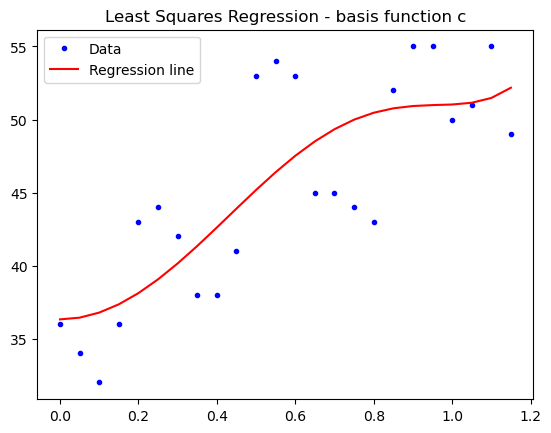

Train error for basis function c:  18.8701


In [20]:
w, y_hat_c = fit_least_square(X_c, df["Republican_Count"])

#Compute the error 
error_c = compute_averaged_squared_error(y_hat_c , df["Republican_Count"])


# Plot the data and regression line using the cosinus features.

plt.plot( df["Year"], df["Republican_Count"], 'b.', label='Data')
plt.plot(df["Year"], y_hat_c, 'r', label='Regression line')
plt.title('Least Squares Regression - basis function c')
plt.legend()
plt.show()


print(f'Train error for basis function c: {error_c: .4f}')

d - Create cosinus features of the type: $\phi_j(x)=cos(x/j)$  for  $j=1,...,25$.

In [21]:
array_d = np.arange(1,26)

In [22]:
X_d = basis_c_and_d(df["Year"], array_d)

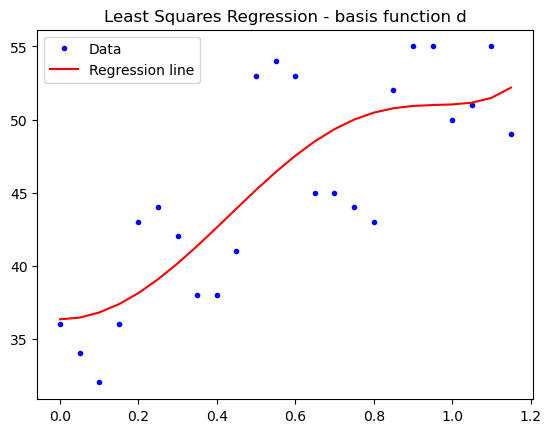

Train error for basis function d:  18.8703


In [23]:
w, y_hat_d = fit_least_square(X_d, df["Republican_Count"])

#Compute the error 
error_d = compute_averaged_squared_error(y_hat_d , df["Republican_Count"])

# Plot the data and regression line using the cosinus features.

plt.plot( df["Year"], df["Republican_Count"], 'b.', label='Data')
plt.plot(df["Year"], y_hat_d, 'r', label='Regression line')
plt.title('Least Squares Regression - basis function d')
plt.legend()
plt.show()

print(f'Train error for basis function d: {error_d: .4f}')


5 - Repeat the process for number of sunspots (x-axis) and number of republicans (y-axis)

In [6]:
# Scale the Sunspot_count columns
df["Sunspot_Count"] = df["Sunspot_Count"]/20

# Select all data from before 1985
df_question5 = df.loc[0:12,:]

df_question5

,Year,Sunspot_Count,Republican_Count
0,0.00,5.615,36
1,0.05,1.880,34
2,0.10,0.510,32
3,0.15,2.350,36
4,0.20,5.295,43
5,0.25,5.225,44
6,0.30,3.445,42
7,0.35,1.725,38
8,0.40,0.630,38
9,0.45,4.625,41


In [7]:
# We need to arrange the frame such that our x-axis (sunspot_count) is sorted

df_question5 = df_question5.sort_values("Sunspot_Count")

"""
Iterative version : 

df_question5["Sunspot_Count_Sorted"]= np.sort(df_question5["Sunspot_Count"])

dic={}
i=0
for val in df_question5["Sunspot_Count"]:
    dic[val]=i
    i += 1
    
Republican_Count_sorted = []
for val in df_question5["Sunspot_Count_Sorted"]:
    val_y = df_question5["Republican_Count"][dic[val]]
    Republican_Count_sorted.append(val_y)

df_question5["Republican_Count"] = Republican_Count_sorted
df_question5["Sunspot_Count"] = df_question5["Sunspot_Count_Sorted"]
"""

df_question5.head()


,Year,Sunspot_Count,Republican_Count
2,0.10,0.510,32
8,0.40,0.630,38
7,0.35,1.725,38
1,0.05,1.880,34
12,0.60,2.295,53


 $\phi_j(x)=x^j$ for $j=1,...,5$ .

In [8]:
X_a_q5 = basis_a(df_question5["Sunspot_Count"], max_degree)

NameError: name 'basis_a' is not defined

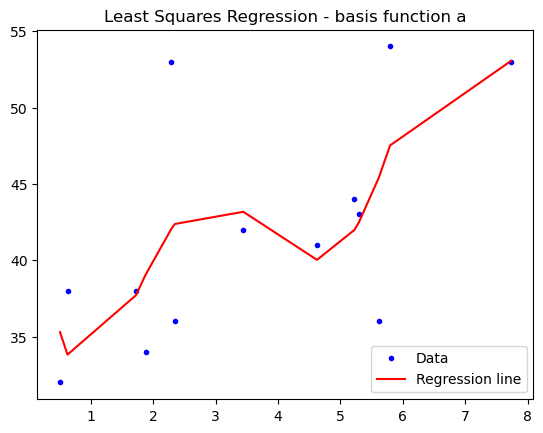

Train error for basis function a:  27.0175


In [27]:
w, y_hat_a_q5 = fit_least_square(X_a_q5, df_question5["Republican_Count"])

#Compute the error 
error_a_q5 = compute_averaged_squared_error(y_hat_a_q5 , df_question5["Republican_Count"])

# Plot the data and regression line using the polynomial features.

plt.plot( df_question5["Sunspot_Count"], df_question5["Republican_Count"], 'b.', label='Data')
plt.plot(df_question5["Sunspot_Count"], y_hat_a_q5, 'r', label='Regression line')
plt.title('Least Squares Regression - basis function a')
plt.legend()
plt.show()


print(f'Train error for basis function a: {error_a_q5: .4f}')

$\phi_j(x)=cos(x/j)$  for  $j=1,...,5$.

In [28]:
X_c_q5 = basis_c_and_d(df_question5["Sunspot_Count"], array_c)

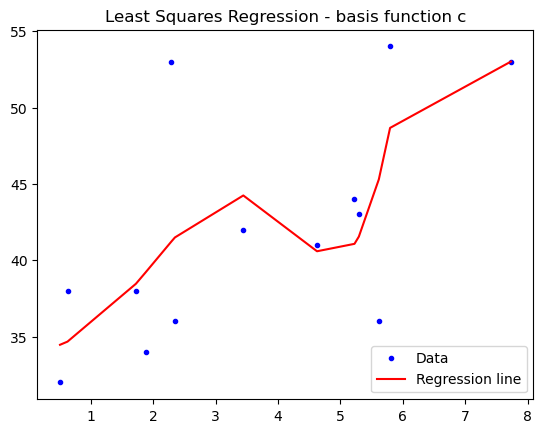

Train error for basis function c:  26.4455


In [29]:
w, y_hat_c_q5 = fit_least_square(X_c_q5, df_question5["Republican_Count"])

#Compute the error 
error_c_q5 = compute_averaged_squared_error(y_hat_c_q5 , df_question5["Republican_Count"])

# Plot the data and regression line using the polynomial features.

plt.plot( df_question5["Sunspot_Count"], df_question5["Republican_Count"], 'b.', label='Data')
plt.plot(df_question5["Sunspot_Count"], y_hat_c_q5, 'r', label='Regression line')
plt.title('Least Squares Regression - basis function c')
plt.legend()
plt.show()


print(f'Train error for basis function c: {error_c_q5: .4f}')

$\phi_j(x)=cos(x/j)$   for $j=1,...,25$ 

In [88]:
X_d_q5 = basis_c_and_d(df_question5["Sunspot_Count"], array_d)

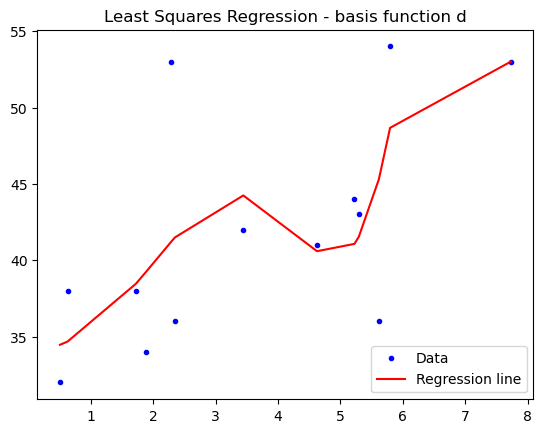

Train error for basis function d:  26.4433


In [89]:
w, y_hat_d_q5 = fit_least_square(X_d_q5, df_question5["Republican_Count"])

#Compute the error 
error_d_q5 = compute_averaged_squared_error(y_hat_d_q5 , df_question5["Republican_Count"])

# Plot the data and regression line using the polynomial features.

plt.plot( df_question5["Sunspot_Count"], df_question5["Republican_Count"], 'b.', label='Data')
plt.plot(df_question5["Sunspot_Count"], y_hat_d_q5, 'r', label='Regression line')
plt.title('Least Squares Regression - basis function d')
plt.legend()
plt.show()


print(f'Train error for basis function d: {error_d_q5: .4f}')


6 - Which of the three basis provided the best fit?

The best fit was provided with the last basis function d as the train error is smaller (26.4433). However, the basis c which is almost the same, has a train error slighly higher (26.4455). Then, it is  more efficient to choose the basis function c. Keeping in mind the generalizability of the model, the best fit is the c. 

7- The number of sunspots control the number of republicans?

There is a link between the number of sunspots and the number of republicans but it is clear that the number of sunspots don't control the number of republicans. The train error remains too high to affirm that.